In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os
from matplotlib.colors import LogNorm


from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [3]:
#Importing file

LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)


#Caricamenot BX delle stubs
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento informazioni sulle stubs che possono contenere candidati muoni 
nBmtfMuons_LS133 = bmtf_awk_LS133.nBmtfMuons
nBmtfMuons_LS263 = bmtf_awk_LS263.nBmtfMuons
nBmtfMuons_LS264 = bmtf_awk_LS264.nBmtfMuons
nBmtfMuons_LS306 = bmtf_awk_LS306.nBmtfMuons

In [4]:
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_bmtf_counts_LS133 = np.bincount(BX_LS133, weights=nBmtfMuons_LS133)
bx_bmtf_counts_LS263 = np.bincount(BX_LS263, weights=nBmtfMuons_LS263)
bx_bmtf_counts_LS264 = np.bincount(BX_LS264, weights=nBmtfMuons_LS264)
bx_bmtf_counts_LS306 = np.bincount(BX_LS306, weights=nBmtfMuons_LS306)

bx_bmtf_counts = (bx_bmtf_counts_LS133 + bx_bmtf_counts_LS263 + bx_bmtf_counts_LS264 + bx_bmtf_counts_LS306)/4



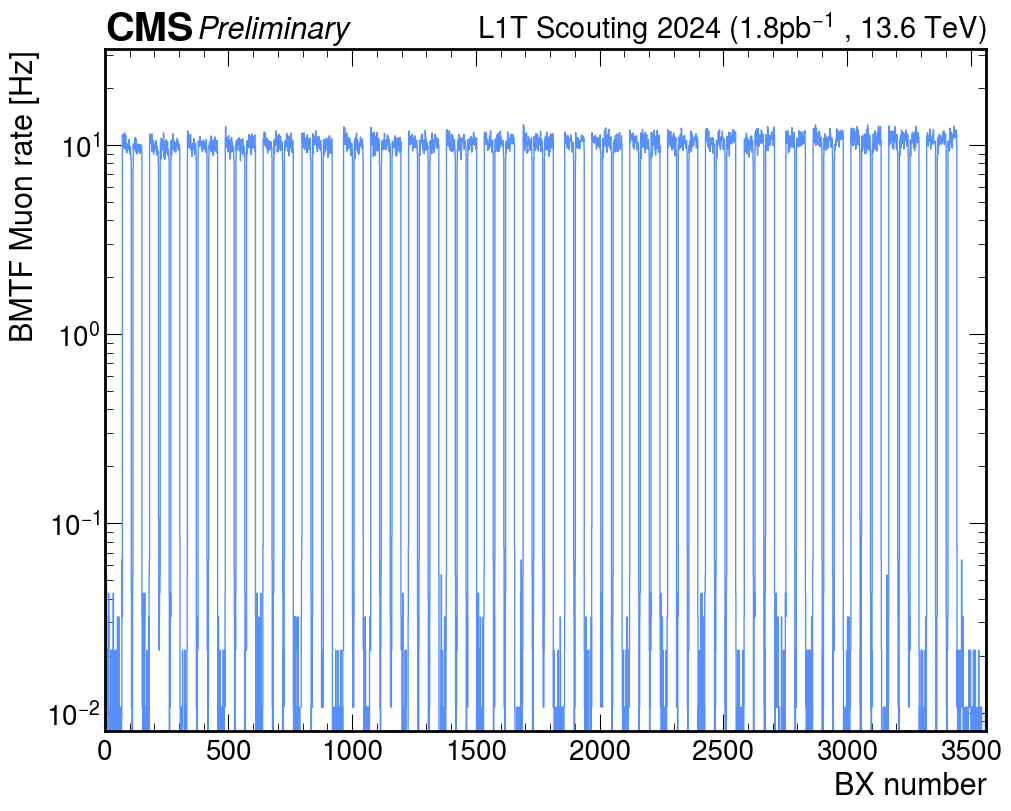

In [5]:
#Plot con i quattro file uniti
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE)

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('BMTF Muon rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_ylim(0.8e-2, 32)
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF.pdf")

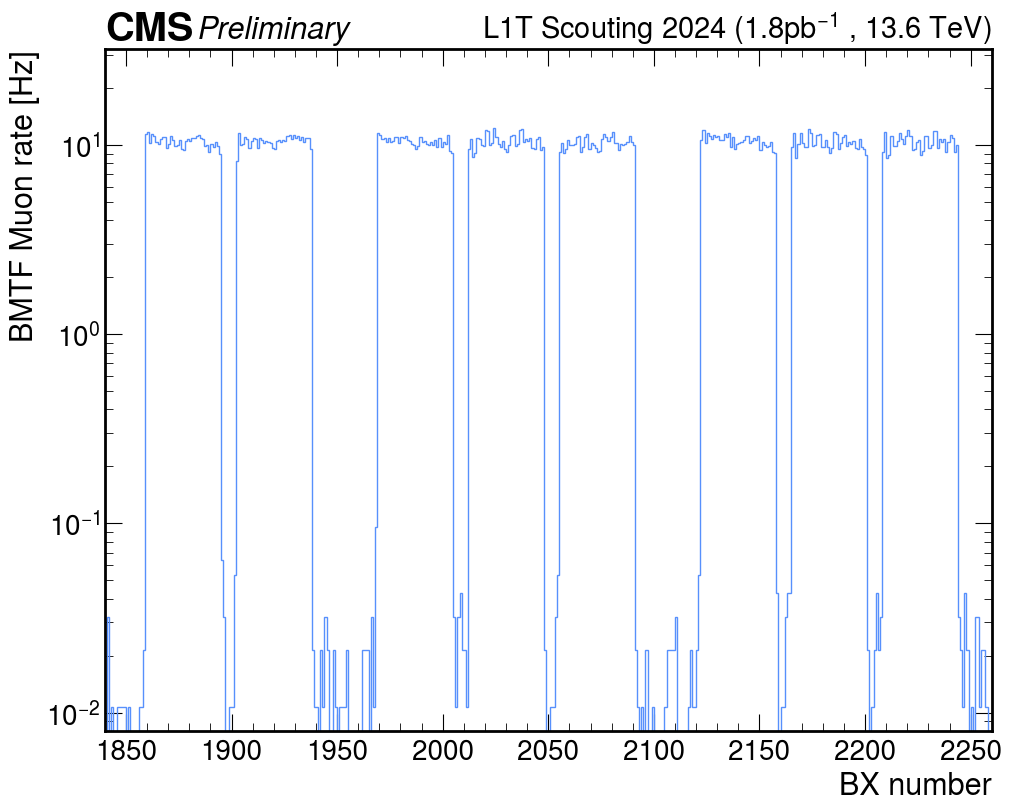

In [6]:
#Zoom dei quattro file uniti
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE)

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_bmtf_counts[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('BMTF Muon rate [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_ylim(0.8e-2, 32)
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_zoom.pdf")

# Molteplicità per bx e per orbit

La maggiorparte degli eventi ha un numero pari a 0 di BX, ma c'è da ricordare che in questo grafico ci sono tutti gli eventi (pari a circa 3 milioni), quindi la maggiorparte non sono stati validati dal BMTF per essere muoni. Vegono visualizzati anche quelli per completezza

In [7]:
nBmtfLS133_count = ConvertToHz(np.bincount(nBmtfMuons_LS133))
nBmtfLS263_count = ConvertToHz(np.bincount(nBmtfMuons_LS263))
nBmtfLS264_count = ConvertToHz(np.bincount(nBmtfMuons_LS264))
nBmtfLS306_count = ConvertToHz(np.bincount(nBmtfMuons_LS306))

nBmtf_Array = ak.Array([nBmtfLS133_count, nBmtfLS263_count, nBmtfLS264_count, nBmtfLS306_count])

MaxStubs = max(len(nBmtf_Array[0]), len(nBmtf_Array[1]), len(nBmtf_Array[2]), len(nBmtf_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnBmtfLS133 = ak.fill_none(ak.pad_none(nBmtf_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS263 = ak.fill_none(ak.pad_none(nBmtf_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS264 = ak.fill_none(ak.pad_none(nBmtf_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS306 = ak.fill_none(ak.pad_none(nBmtf_Array[3], MaxStubs, axis = 0, clip=True), 0)

nBmtf = FnBmtfLS133 + FnBmtfLS263 + FnBmtfLS264 + FnBmtfLS306
print(nBmtf)

[4.07e+05, 8.35e+04, 6.39e+03, 157, 7.62, 0.171, 0.0428]


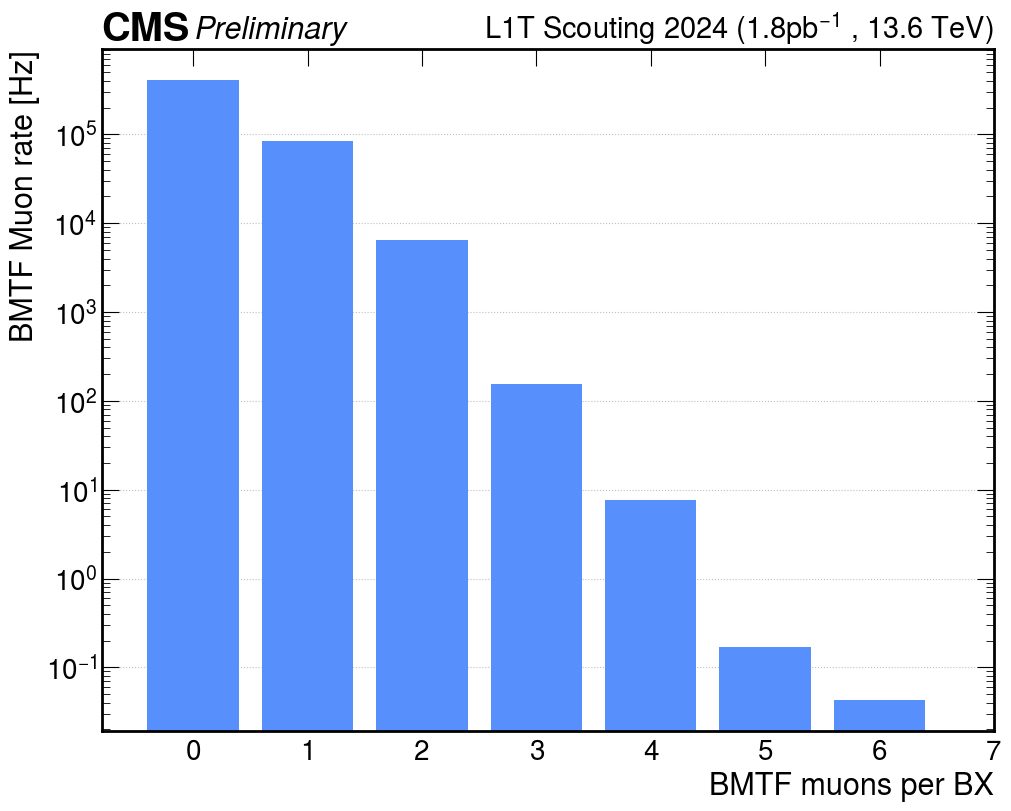

In [8]:
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE)

ax.bar(np.arange(len(nBmtf)), nBmtf)

ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BMTF muons per BX')
ax.set_ylabel('BMTF Muon rate [Hz]')
ax.set_xlim(-0.8, 7)
ax.grid(visible=True, axis='y')
ax.set_axisbelow(True)
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_Molteplicity.pdf")

In [9]:
#Calcola le stubs per orbit, tempo di compilazione 4 minuti 
'''
BmtfPerOrbitLS133 = StubsPerOrbit(BX_LS133, nBmtfMuons_LS133)
BmtfPerOrbitLS263 = StubsPerOrbit(BX_LS263, nBmtfMuons_LS263)
BmtfPerOrbitLS264 = StubsPerOrbit(BX_LS264, nBmtfMuons_LS264)
BmtfPerOrbitLS306 = StubsPerOrbit(BX_LS306, nBmtfMuons_LS306)
'''

'\nBmtfPerOrbitLS133 = StubsPerOrbit(BX_LS133, nBmtfMuons_LS133)\nBmtfPerOrbitLS263 = StubsPerOrbit(BX_LS263, nBmtfMuons_LS263)\nBmtfPerOrbitLS264 = StubsPerOrbit(BX_LS264, nBmtfMuons_LS264)\nBmtfPerOrbitLS306 = StubsPerOrbit(BX_LS306, nBmtfMuons_LS306)\n'

In [10]:
len(BmtfPerOrbitLS263)

63

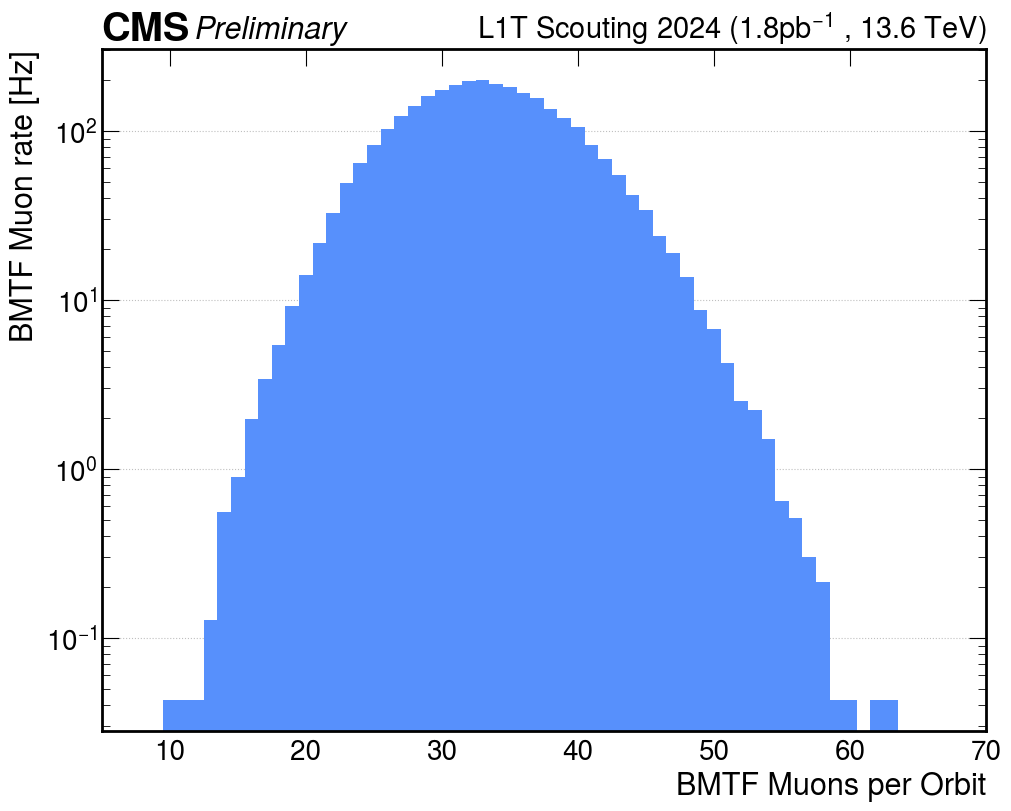

In [11]:
BmtfPerOrbit = ConvertToHz(BmtfPerOrbitLS133 + BmtfPerOrbitLS263 + BmtfPerOrbitLS264 + BmtfPerOrbitLS306)

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE)

ax.bar(np.arange(1, len(BmtfPerOrbit) + 1), BmtfPerOrbit, width=1)


#ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BMTF Muons per Orbit')
ax.set_ylabel('BMTF Muon rate [Hz]')
ax.set_xlim(5, 70)
ax.grid(visible=True, axis='y')
ax.set_axisbelow(True)
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_orbit.pdf")

# Momenti Constrained and Unconstrained 

In [12]:
#Caricamento elementi Constrained e Unconstrained in Gev/c
bmtfPtLS133 = ak.flatten(bmtf_awk_LS133.bmtfPt)
bmtfPtLS263 = ak.flatten(bmtf_awk_LS263.bmtfPt)
bmtfPtLS264 = ak.flatten(bmtf_awk_LS264.bmtfPt)
bmtfPtLS306 = ak.flatten(bmtf_awk_LS306.bmtfPt)


bmtfPtuLS133 = ak.flatten(bmtf_awk_LS133.bmtfPtu)
bmtfPtuLS263 = ak.flatten(bmtf_awk_LS263.bmtfPtu)
bmtfPtuLS264 = ak.flatten(bmtf_awk_LS264.bmtfPtu)
bmtfPtuLS306 = ak.flatten(bmtf_awk_LS306.bmtfPtu)

BmtfEtaLS133 = ak.flatten(bmtf_awk_LS133.bmtfEta)
BmtfEtaLS263 = ak.flatten(bmtf_awk_LS263.bmtfEta)
BmtfEtaLS264 = ak.flatten(bmtf_awk_LS264.bmtfEta)
BmtfEtaLS306 = ak.flatten(bmtf_awk_LS306.bmtfEta)

Pt = ak.concatenate([bmtfPtLS133, bmtfPtLS263, bmtfPtLS264, bmtfPtLS306])
Ptu = ak.concatenate([bmtfPtuLS133, bmtfPtuLS263, bmtfPtuLS264, bmtfPtuLS306])
BmtfEta = ak.concatenate([BmtfEtaLS133, BmtfEtaLS263, BmtfEtaLS264, BmtfEtaLS306])

PtDiff = Pt - Ptu

255.0


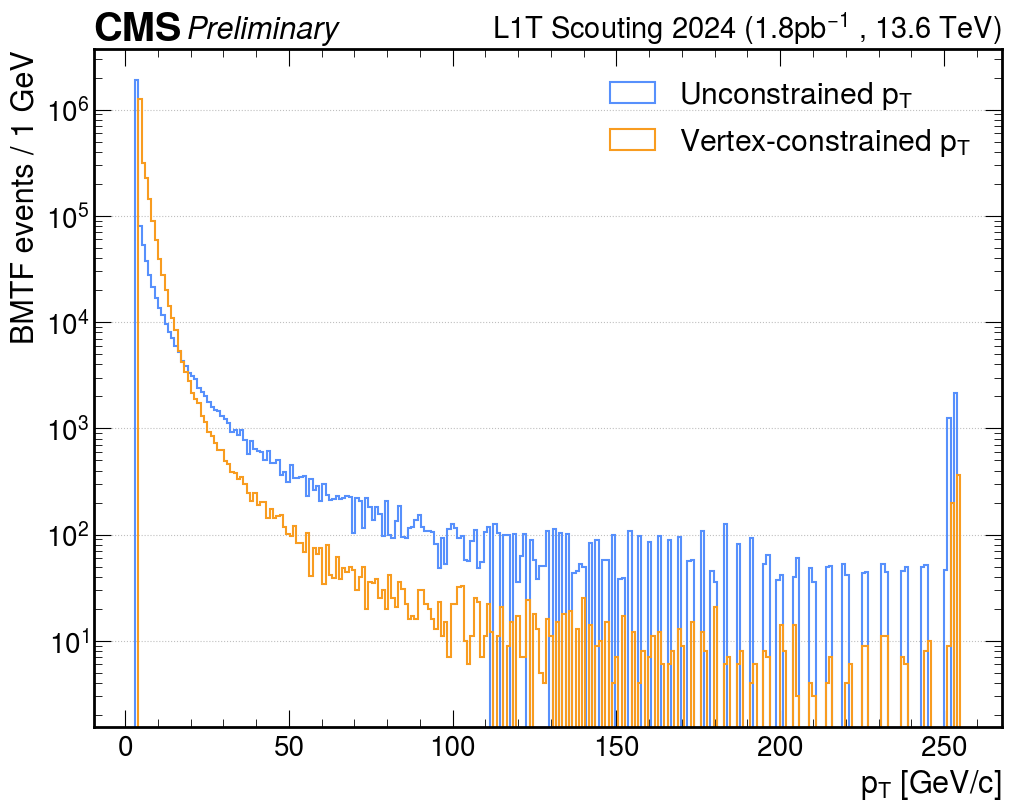

In [13]:
#Plot di Pt e Ptu uniti

print(np.max(Pt))

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE)

ax.hist(Ptu, bins = 250,  label='Unconstrained $p_T$', histtype='step', linewidth = 1.5)
ax.hist(Pt, bins = 250, label='Vertex-constrained $p_T$', histtype='step', linewidth = 1.5)

ax.set_xlabel(r'$p_T$ [GeV/c]')
ax.set_ylabel(r'BMTF events / 1 GeV')
ax.set_axisbelow(True)

ax.legend()

ax.grid(visible=True, axis='y')
ax.set_yscale('log')

plt.savefig("../Immagini/BMTF_PtPtu.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1.0, 3.007999897003174)


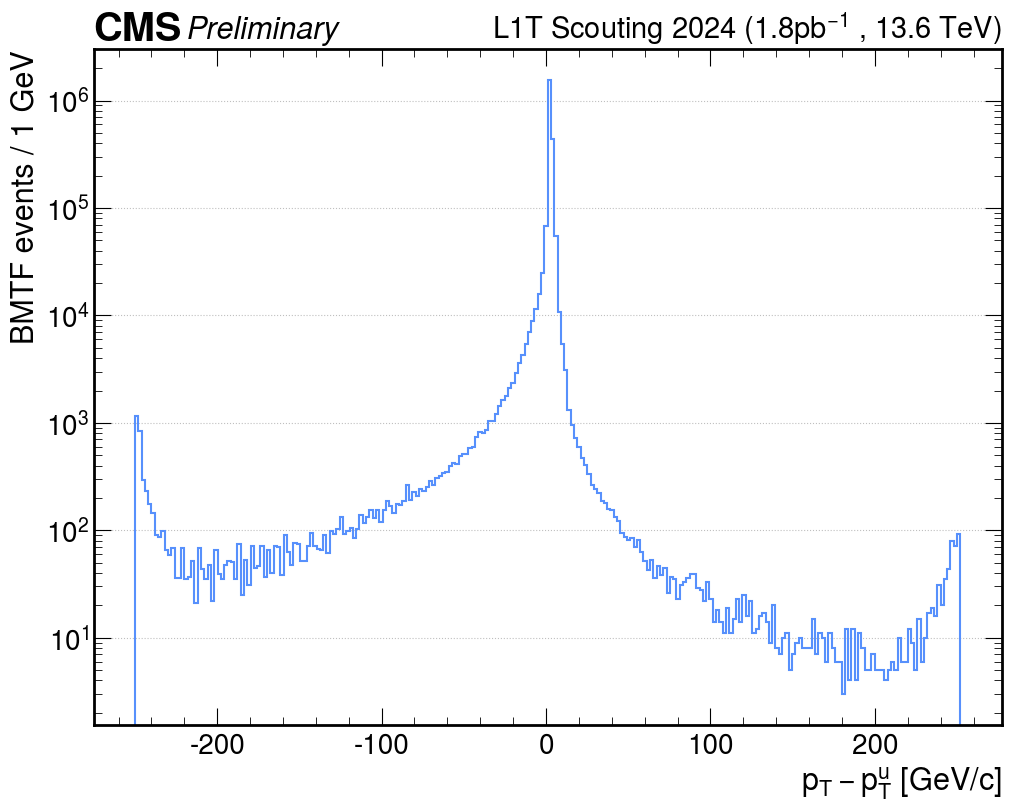

In [14]:
#Distribuzione della differenza
fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE)

counts, bin_edges, _ = ax.hist(PtDiff, bins = 250, histtype='step', linewidth = 1.5)
max_count = np.max(counts)
max_bin_index = np.argmax(counts)
max_bin_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])

print(max_bin_range)

ax.set_xlabel(r'$p_T - p_{T}^u$ [GeV/c]')
ax.set_ylabel(r'BMTF events / 1 GeV')
ax.legend()
ax.set_axisbelow(True)

#ax.set_xlim(0, 50)
#ax.set_ylim(0, 1000)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

#plt.savefig("../Immagini/BMTF_PtPtu.pdf")


# Controllo eta per gli eventi nella coda "lunga"

In [15]:
print(len(PtDiff))

EtaPtLeft = [BmtfEta[i] for i in range(len(PtDiff)) if PtDiff[i] < 0]
PtDiffLeft = PtDiff[PtDiff < 0]
PtDiffRight = PtDiff[PtDiff >= 0]
EtaPtRight = [BmtfEta[i] for i in range(len(PtDiff)) if PtDiff[i] >= 0]

2260319


<>:51: SyntaxWarning: invalid escape sequence '\e'
<>:51: SyntaxWarning: invalid escape sequence '\e'
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_6615/3353388434.py:51: SyntaxWarning: invalid escape sequence '\e'
  ax2.set_xlabel('$\eta$')


[[0.00136764 0.00046847 0.00038303 0.00057216 0.00048851 0.00040083
  0.00054234 0.00036646 0.00046558 0.001359  ]
 [0.00137797 0.00047205 0.00038574 0.00057655 0.00049308 0.00040345
  0.00054662 0.00036905 0.00046908 0.00136906]]


/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_6615/3353388434.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 2)


Text(1, 0, '$\\eta$')

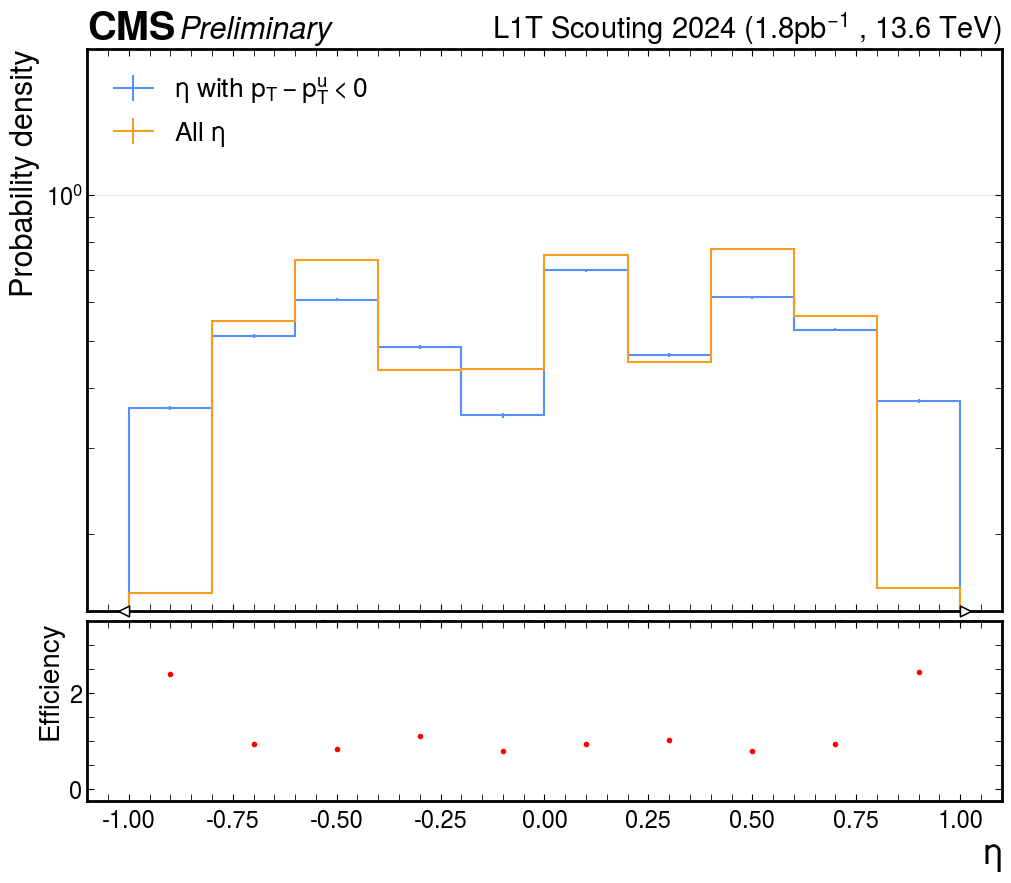

In [16]:
PtDiffLeftRange = np.arange(-252, 0, 10)
EtaRange = np.arange(-1, 1.2, 0.2)

EtaPtLeft_Hist = hist.Hist(hist.axis.Variable(np.round(EtaRange, 2), name='Eta', ),)
EtaPtRight_Hist = hist.Hist(hist.axis.Variable(np.round(EtaRange, 2), name='Eta', ),)
EtaPt_Hist = hist.Hist(hist.axis.Variable(np.round(EtaRange, 2), name='Eta', ),)

EtaPtLeft_Hist.fill(Eta=EtaPtLeft)
EtaPtRight_Hist.fill(Eta=EtaPtRight)
EtaPt_Hist.fill(Eta=BmtfEta)


#---------------------------------------------------------------------------------
NormEtaPt = EtaPt_Hist.values()/ np.sum(EtaPt_Hist.values())
NormEtaPtLeft = EtaPtLeft_Hist.values()/ np.sum(EtaPtLeft_Hist.values())
EtaRatio = NormEtaPtLeft / NormEtaPt
#---------------------------------------------------------------------------------

centers = 0.5 * (EtaRange[1:] + EtaRange[:-1])

from hist import intervals
Error = hist.intervals.ratio_uncertainty(EtaPtLeft_Hist.values(), EtaPt_Hist.values(), uncertainty_type = 'efficiency')
print(Error)

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

hep.histplot(EtaPtLeft_Hist, label=r"$\eta$ with $p_T - p_{T}^u < 0$", yerr = True, density = True)
hep.histplot(EtaPt_Hist, label=r"All $\eta$", yerr = True, density = True)

ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$\eta$')
ax.set_yscale("log")
ax.tick_params(axis='both', which='both', length=5, labelsize = FONTSIZE - 5)
#ax.legend()
ax.set_ylim(0, 2)
ax.set_axisbelow(True)
ax.legend(loc='upper left', fontsize = FONTSIZE - 3)


divider = make_axes_locatable(ax)
ax2 = divider.append_axes("bottom", 1.8, pad=0.1, sharex=ax)
ax2.tick_params(axis='both', which='both', length=5, labelsize = FONTSIZE - 5)
ax2.errorbar(centers, EtaRatio, yerr = Error, fmt = '.', c = 'red',)
ax2.set_ylim(-0.25, 3.5)
ax2.set_ylabel("Efficiency", fontsize = FONTSIZE - 2)
ax2.set_xlabel('$\eta$')

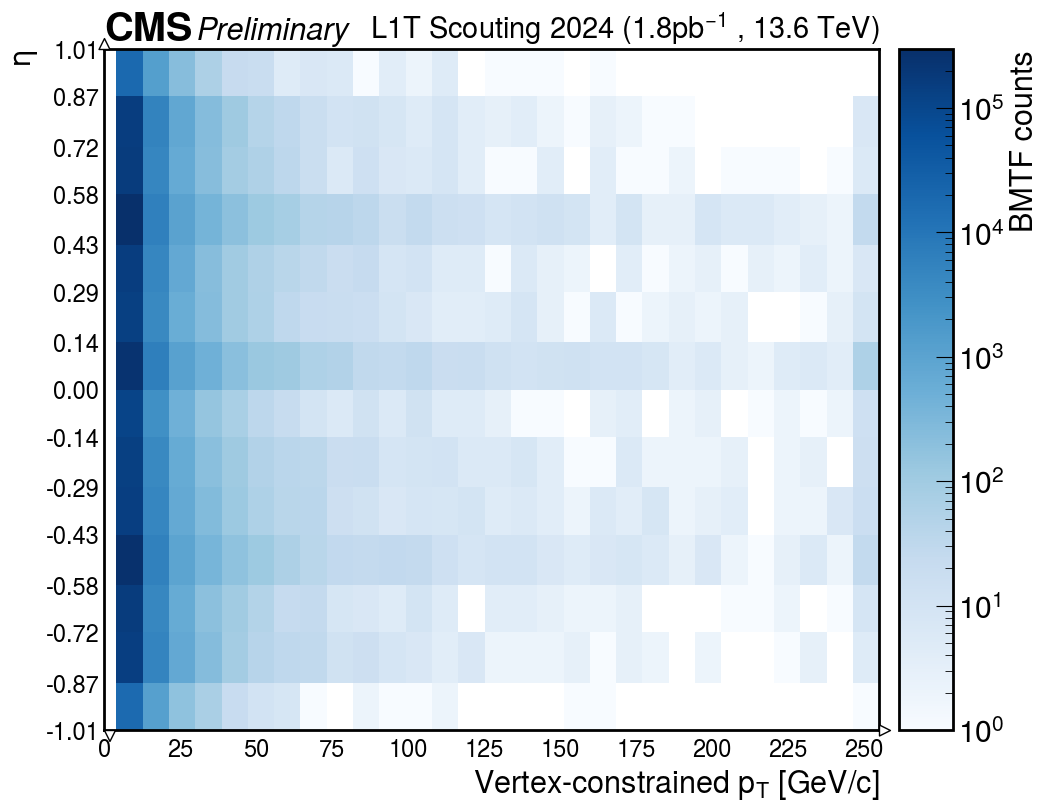

In [17]:
#Grafico bidimensionale per i Bmtf del momento e di eta 

BinEta = 15
BinPt = 30

EtaRange, EtaIndicies = Bins(ak.min(BmtfEta), ak.max(BmtfEta), BinEta, BmtfEta)
PtRange, PtIndicies = Bins(ak.min(Pt), ak.max(Pt), BinPt, Pt)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(PtRange, 2), name='Pt', label='Pt number'),
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', label='Eta number'),
)
hist2d.fill(Pt=Pt, Eta=BmtfEta)

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
#draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

from matplotlib.colors import LogNorm

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax, norm = LogNorm())

cbar = ax.collections[0].colorbar
cbar.set_label('BMTF counts', fontsize=FONTSIZE)

ax.set_xlabel(r'Vertex-constrained $p_T$ [GeV/c]')
ax.set_ylabel(r'$\eta$')
ax.set_xticks(np.arange(0, 275, 25))

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)

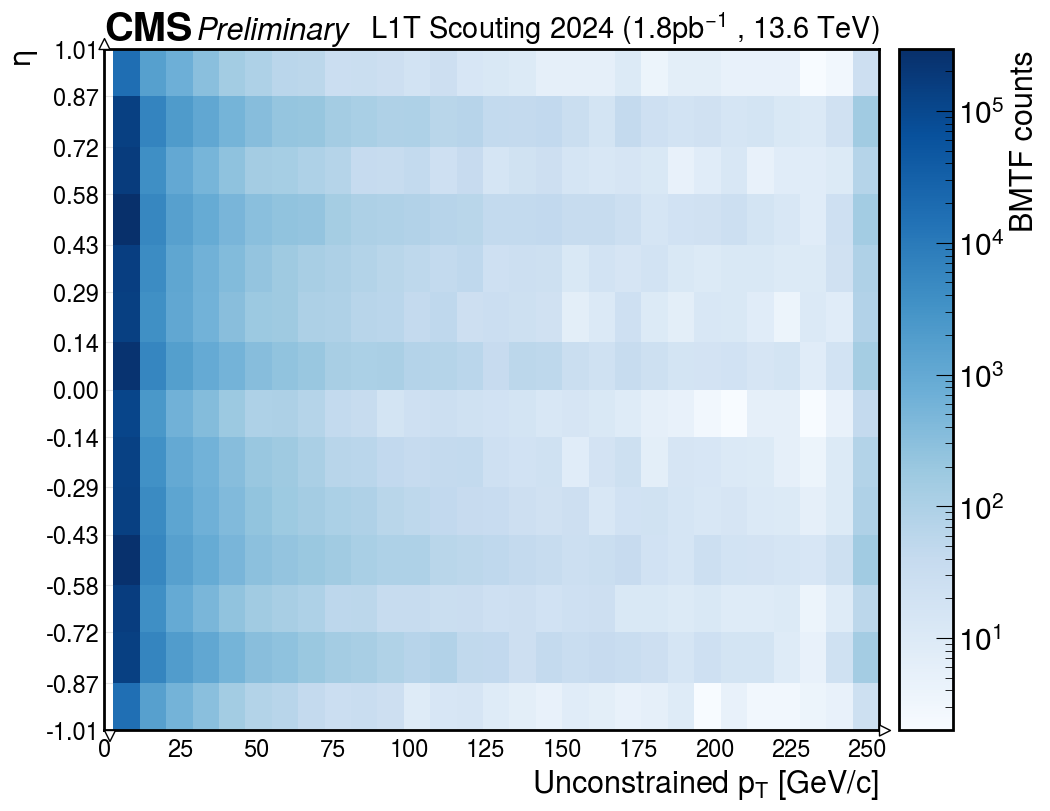

In [18]:
#Grafico bidimensionale per i GMT del momento e di eta 

BinEta = 15
BinPtu = 30

EtaRange, EtaIndicies = Bins(ak.min(BmtfEta), ak.max(BmtfEta), BinEta, BmtfEta)
PtuRange, PtuIndicies = Bins(ak.min(Ptu), ak.max(Ptu), BinPtu, Ptu)

hist2d = hist.Hist(
    hist.axis.Variable(np.round(PtuRange, 2), name='Ptu', label='Ptu number'),
    hist.axis.Variable(np.round(EtaRange, 2), name='Eta', label='Eta number'),
)
hist2d.fill(Ptu=Ptu, Eta=BmtfEta)

fig, ax = plt.subplots(figsize= FIGSIZE, constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize= FONTSIZE)

from matplotlib.colors import LogNorm

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax, norm = LogNorm())

cbar = ax.collections[0].colorbar
cbar.set_label('BMTF counts', fontsize=FONTSIZE)

ax.set_xlabel(r'Unconstrained $p_T$ [GeV/c]')
ax.set_ylabel(r'$\eta$')
ax.set_xticks(np.arange(0, 275, 25))

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)

In [19]:
BmtfPhiDistribution = ArrayConcatenation(BmtfPhiDistributionLS133, BmtfPhiDistributionLS263, BmtfPhiDistributionLS264, BmtfPhiDistributionLS306)


<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
/var/folders/73/kb390p311j3ctnbn_v15y42w0000gn/T/ipykernel_6615/626863067.py:20: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('$\phi$ [rad]')


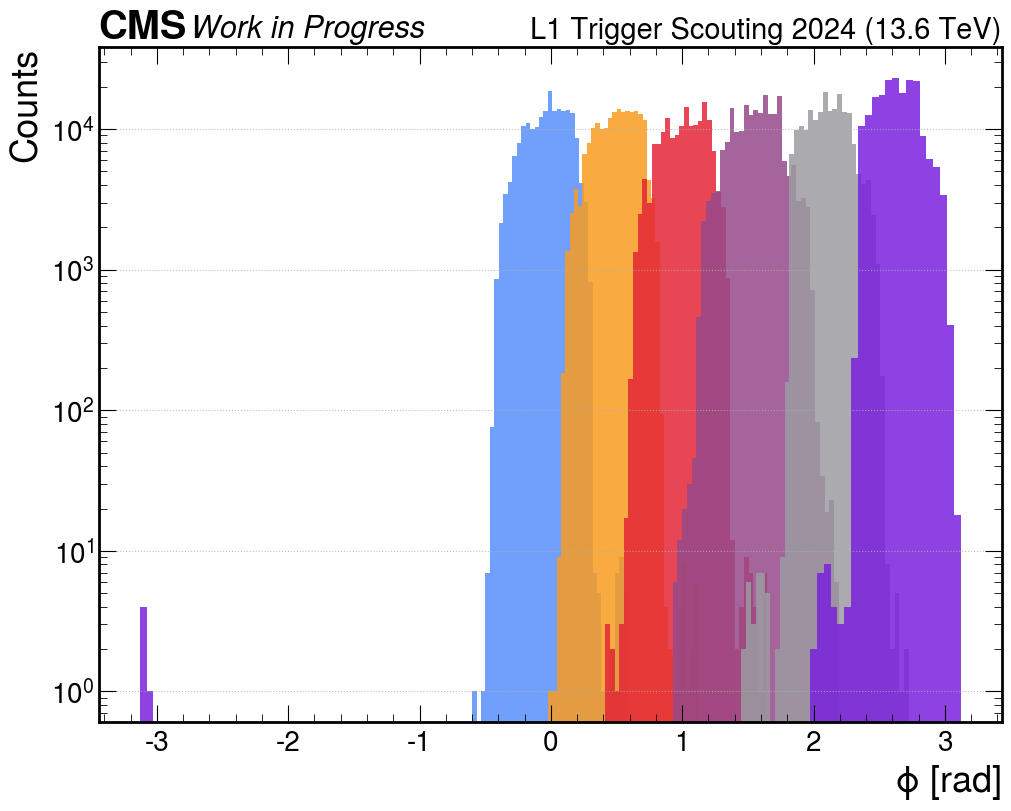

In [20]:
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(BmtfPhiDistribution[0], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[1], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[2], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[3], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[4], bins = 35, alpha = 0.85)
ax.hist(BmtfPhiDistribution[5], bins = 120, alpha = 0.85)
#ax.hist(BmtfPhiDistribution[6], bins = 120, alpha = 0.85)
#ax.hist(BmtfPhiDistribution[7], bins = 120, alpha = 0.85)
#ax.hist(BmtfPhiDistribution[8], bins = 35, alpha = 0.85)
#ax.hist(BmtfPhiDistribution[9], bins = 35, alpha = 0.85)
#ax.hist(BmtfPhiDistribution[10], bins = 35, alpha = 0.85)
#ax.hist(BmtfPhiDistribution[11], bins = 35, alpha = 0.85)


ax.set_xlabel('$\phi$ [rad]')
ax.set_ylabel('Counts')
#ax.legend()

ax.grid(visible=True, axis='y')
ax.set_yscale('log')
